In [219]:
from pathlib import Path
import sys
import json
from argparse import ArgumentParser, Namespace

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

sys.path.append('..')

from src.models import LandCoverMapper, STR2MODEL
from src.utils.visualize import plot_roc_curve

## Experimenting

In [29]:
model_path = '../data/lightning_logs/version_896/checkpoints/epoch=21.ckpt' # obtained with python models.py --geowiki_subset neighbours1 --weighted_loss_fn --inference True
#model_path = '../data/lightning_logs/version_899/checkpoints/epoch=21.ckpt' -> from results/final. Those in paper
#model_path = '../data/lightning_logs/version_919/checkpoints/epoch=21.ckpt'
model = LandCoverMapper.load_from_checkpoint(model_path, data_folder='../data')

Found normalizing dict geowiki_normalizing_dict_Ghana_Togo_Nigeria_Cameroon_Benin.h5
Loading normalizing dict geowiki_normalizing_dict_Ghana_Togo_Nigeria_Cameroon_Benin.h5
Creating Geowiki train split
Creating Geowiki val split
Number of instances in Geowiki training set: 632
Number of instances in Nigeria training set: 913
Total number of files used for training: 1545
Number of instances in Geowiki validation set: 158
Number of instances in Nigeria validation set: 454
Total number of files used for validation: 612
Number of global labels: 2157
Number of local labels: 0
Global class weights: tensor([1.9004, 2.1106])
Local class weights: None
Number of model parameters: 25473


In [3]:
# logger = TensorBoardLogger('dummy_logs', name='dummy_model') # dummy logger just so that when validation_step is called, it doesn't complain about not having a logger
# model.logger = logger

In [31]:
model.training

True

In [32]:
if model.training:
    model.eval() # important for deactivating dropout
model.training

False

In [33]:
model.save_validation_predictions()

Number of instances in Nigeria testing set: 455


In [34]:
split = 'testing'
preds_path = Path(f'../data/LandCoverMapper/{split}/all_preds.npy')
labels_path = Path(f'../data/LandCoverMapper/{split}/all_labels.npy')
# preds_path = Path(model_path).parent.parent / split / 'all_preds.npy'
# labels_path = Path(model_path).parent.parent / split / 'all_labels.npy'

In [35]:
preds = np.load(preds_path).squeeze()
labels = np.load(labels_path).squeeze()

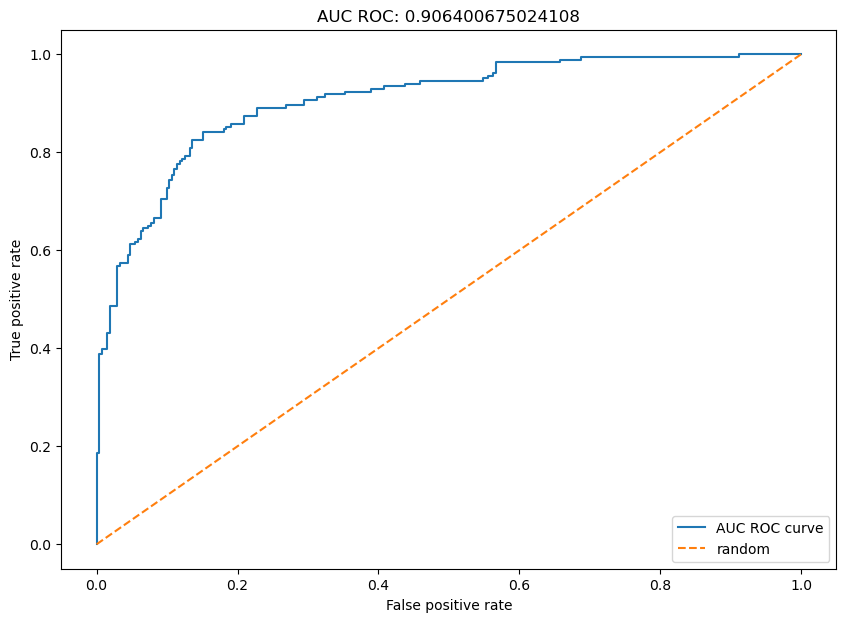

In [36]:
plot_roc_curve(labels, preds, threshold_spacing=None)

In [37]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

In [38]:
roc_auc_score(labels, preds)

0.906400675024108

In [39]:
fpr, tpr, thresholds = roc_curve(labels, preds)
auc(fpr, tpr)

0.906400675024108

In [40]:
preds = (preds > 0.5).astype(int)
print(precision_score(labels, preds))
print(recall_score(labels, preds))
print(f1_score(labels, preds))
print(accuracy_score(labels, preds))

0.7875647668393783
0.8306010928961749
0.8085106382978724
0.8417582417582418


: 

## Plot several curves

In [252]:
results_dir = 'final2'
model_base = 'lstm'
results_path = Path('../results') / results_dir / model_base / f'results_{results_dir}_{model_base}.csv'
df = pd.read_csv(results_path)
df

,add_nigeria,add_geowiki,geowiki_subset,multi_headed,weighted_loss_fn,hidden_vector_size,final_epoch,num_rnn_layers,test_on,log_dir,...,test_precision_score,test_recall_score,test_f1_score,test_accuracy,test_TN,test_FP,test_FN,test_TP,result_filepath,result_timestamp
0,True,False,world,False,True,64,30,1,testing,/mnt/Data/jgajardo/code/togo-crop-mask/scripts...,...,0.771739,0.775956,0.773842,0.817582,230.0,42.0,41.0,142.0,/mnt/Data/jgajardo/code/togo-crop-mask/results...,20230806_211436
1,True,True,nigeria,False,True,64,28,1,testing,/mnt/Data/jgajardo/code/togo-crop-mask/scripts...,...,0.770732,0.863388,0.814433,0.841758,225.0,47.0,25.0,158.0,/mnt/Data/jgajardo/code/togo-crop-mask/results...,20230806_211918
2,True,True,neighbours1,False,True,64,25,1,testing,/mnt/Data/jgajardo/code/togo-crop-mask/scripts...,...,0.787565,0.830601,0.808511,0.841758,231.0,41.0,31.0,152.0,/mnt/Data/jgajardo/code/togo-crop-mask/results...,20230806_212226
3,True,True,world,False,True,64,30,1,testing,/mnt/Data/jgajardo/code/togo-crop-mask/scripts...,...,0.670996,0.846995,0.748792,0.771429,196.0,76.0,28.0,155.0,/mnt/Data/jgajardo/code/togo-crop-mask/results...,20230806_220707
4,False,True,nigeria,False,True,64,37,1,testing,/mnt/Data/jgajardo/code/togo-crop-mask/scripts...,...,0.561475,0.748634,0.641686,0.663736,165.0,107.0,46.0,137.0,/mnt/Data/jgajardo/code/togo-crop-mask/results...,20230806_221032
5,False,True,neighbours1,False,True,64,26,1,testing,/mnt/Data/jgajardo/code/togo-crop-mask/scripts...,...,0.687783,0.830601,0.752475,0.780220,203.0,69.0,31.0,152.0,/mnt/Data/jgajardo/code/togo-crop-mask/results...,20230806_221605
6,False,True,world,False,True,64,25,1,testing,/mnt/Data/jgajardo/code/togo-crop-mask/scripts...,...,0.574913,0.901639,0.702128,0.692308,150.0,122.0,18.0,165.0,/mnt/Data/jgajardo/code/togo-crop-mask/results...,20230806_230843
7,True,True,neighbours1,True,True,64,23,1,testing,/mnt/Data/jgajardo/code/togo-crop-mask/scripts...,...,0.737327,0.874317,0.800000,0.824176,215.0,57.0,23.0,160.0,/mnt/Data/jgajardo/code/togo-crop-mask/results...,20230806_231325
8,False,True,world,True,True,64,34,1,testing,/mnt/Data/jgajardo/code/togo-crop-mask/scripts...,...,0.721212,0.650273,0.683908,0.758242,226.0,46.0,64.0,119.0,/mnt/Data/jgajardo/code/togo-crop-mask/results...,20230807_000858
9,True,True,world,True,True,64,29,1,testing,/mnt/Data/jgajardo/code/togo-crop-mask/scripts...,...,0.916667,0.540984,0.680412,0.795604,263.0,9.0,84.0,99.0,/mnt/Data/jgajardo/code/togo-crop-mask/results...,20230807_005805


In [253]:
# Grab two best configs per model type
labels = []
preds = []
names = []
log_names = []

for flag in (False, True):
    group = 'Multi-headed LSTM' if flag else 'Single-headed LSTM'
    prefix = 'Nigeria' if flag else 'all'
    df_subset = df[df['multi_headed'] == flag].sort_values(by='test_accuracy', ascending=False).head(2).reset_index(drop=True)
    
    for i in range(len(df_subset)):
        log_dir_path = Path(df_subset.log_dir[i])
        preds_path = log_dir_path / 'testing' / f'{prefix}_preds.npy'
        labels_path = log_dir_path / 'testing' / f'{prefix}_labels.npy'
        preds.append(np.load(preds_path).squeeze())
        labels.append(np.load(labels_path).squeeze())
        names.append(f'{group} (Geowiki {df_subset.geowiki_subset[i]})')
        log_names.append(log_dir_path.name) 

names = [name.replace('neighbours1', 'neighbours') for name in names]
names = [name.replace('nigeria', 'Nigeria') for name in names]
names, log_names

(['Single-headed LSTM (Geowiki Nigeria)',
  'Single-headed LSTM (Geowiki neighbours)',
  'Multi-headed LSTM (Geowiki neighbours)',
  'Multi-headed LSTM (Geowiki world)'],
 ['version_923', 'version_924', 'version_929', 'version_931'])

In [254]:
# Helper functions
def get_metrics(y_true, y_probs):
    roc_auc = roc_auc_score(y_true, y_probs)
    y_pred = (y_probs > 0.5).astype(int)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    print('RF roc-auc test set:', round(roc_auc, 3))
    print('RF precision test set:', round(precision, 3))
    print('RF recall test set:', round(recall, 3))
    print('RF f1-score test set:', round(f1, 3))
    print('RF accuracy test set:', round(acc, 3))

    return {'roc_auc': roc_auc, 'precision': precision, 'recall': recall, 'f1': f1, 'acc': acc}

def get_model(add_geowiki: bool, add_nigeria: bool, geowiki_subset: str):
    parser = ArgumentParser()
    parser.add_argument("--max_epochs", type=int, default=100)
    parser.add_argument("--patience", type=int, default=10)
    parser.add_argument("--gpus", type=int, default=0)
    parser.add_argument("--wandb", default=False, action="store_true")

    model_args = STR2MODEL["land_cover"].add_model_specific_args(parser).parse_args(args=[])
    new_model_args_dict = vars(model_args)

    # SET MODIFICATIONS TO DEFAULT MODEL ARGUMENTS:
    new_model_args_dict['add_geowiki'] = add_geowiki
    new_model_args_dict['add_nigeria'] = add_nigeria
    new_model_args_dict['geowiki_subset'] =  geowiki_subset # 'nigeria', 'neighbours1'

    new_model_args = Namespace(**new_model_args_dict)
    model = STR2MODEL["land_cover"](new_model_args)
    
    return model

def get_dataset_splits(add_geowiki: bool, add_nigeria: bool, geowiki_subset: str='world', S2_features_only: bool=False):

    # Dirty hack, we use landcovermapper class (only supporting lstm model) class to access model splits
    lancovermapper = get_model(add_geowiki, add_nigeria, geowiki_subset)

    train_dataset = lancovermapper.get_dataset(subset="training").as_array(flatten_x=True, S2_features_only=S2_features_only)
    val_dataset = lancovermapper.get_dataset(subset="validation", normalizing_dict=lancovermapper.normalizing_dict).as_array(flatten_x=True, S2_features_only=S2_features_only)
    #test_dataset = lancovermapper.get_dataset(subset="validation", normalizing_dict=lancovermapper.normalizing_dict, evaluating=True).as_array(flatten_x=True, S2_features_only=S2_features_only) 
    test_dataset = lancovermapper.get_dataset(subset="testing", normalizing_dict=lancovermapper.normalizing_dict).as_array(flatten_x=True, S2_features_only=S2_features_only)

    return (
        train_dataset,
        val_dataset,
        test_dataset
    )

In [255]:
# Get random forest predictions
add_geowiki = True
add_nigeria = True
geowiki_subset = 'nigeria'
(X_train, y_train), (X_val, y_val), (X_test, y_test) = get_dataset_splits(add_geowiki, add_nigeria, geowiki_subset=geowiki_subset)
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_preds = rf.predict_proba(X_test)[:, 1] # for roc_auc_score
metrics = get_metrics(y_test, y_preds)

labels.append(y_test)
preds.append(y_preds)
names.append('Random Forest (Geowiki Nigeria)')

Found normalizing dict geowiki_normalizing_dict_Nigeria.h5
Loading normalizing dict geowiki_normalizing_dict_Nigeria.h5
Creating Geowiki train split
Creating Geowiki val split
Number of instances in Geowiki training set: 361
Number of instances in Nigeria training set: 913
Total number of files used for training: 1274
Number of model parameters: 25473
Number of instances in Geowiki training set: 361
Number of instances in Nigeria training set: 913
Total number of files used for training: 1274
Number of instances in Geowiki validation set: 91
Number of instances in Nigeria validation set: 454
Total number of files used for validation: 545
Number of instances in Nigeria testing set: 455
RF roc-auc test set: 0.915
RF precision test set: 0.782
RF recall test set: 0.825
RF f1-score test set: 0.803
RF accuracy test set: 0.837


In [256]:
# Get random forest predictions
add_geowiki = True
add_nigeria = True
geowiki_subset = 'neighbours1'
(X_train, y_train), (X_val, y_val), (X_test, y_test) = get_dataset_splits(add_geowiki, add_nigeria, geowiki_subset=geowiki_subset)
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_preds = rf.predict_proba(X_test)[:, 1] # for roc_auc_score
metrics = get_metrics(y_test, y_preds)

labels.append(y_test)
preds.append(y_preds)
names.append('Random Forest (Geowiki neighbours)')

Found normalizing dict geowiki_normalizing_dict_Ghana_Togo_Nigeria_Cameroon_Benin.h5
Loading normalizing dict geowiki_normalizing_dict_Ghana_Togo_Nigeria_Cameroon_Benin.h5
Creating Geowiki train split
Creating Geowiki val split
Number of instances in Geowiki training set: 632
Number of instances in Nigeria training set: 913
Total number of files used for training: 1545
Number of model parameters: 25473
Number of instances in Geowiki training set: 632
Number of instances in Nigeria training set: 913
Total number of files used for training: 1545
Number of instances in Geowiki validation set: 158
Number of instances in Nigeria validation set: 454
Total number of files used for validation: 612
Number of instances in Nigeria testing set: 455
RF roc-auc test set: 0.916
RF precision test set: 0.791
RF recall test set: 0.765
RF f1-score test set: 0.778
RF accuracy test set: 0.824


In [257]:
names

['Single-headed LSTM (Geowiki Nigeria)',
 'Single-headed LSTM (Geowiki neighbours)',
 'Multi-headed LSTM (Geowiki neighbours)',
 'Multi-headed LSTM (Geowiki world)',
 'Random Forest (Geowiki Nigeria)',
 'Random Forest (Geowiki neighbours)']

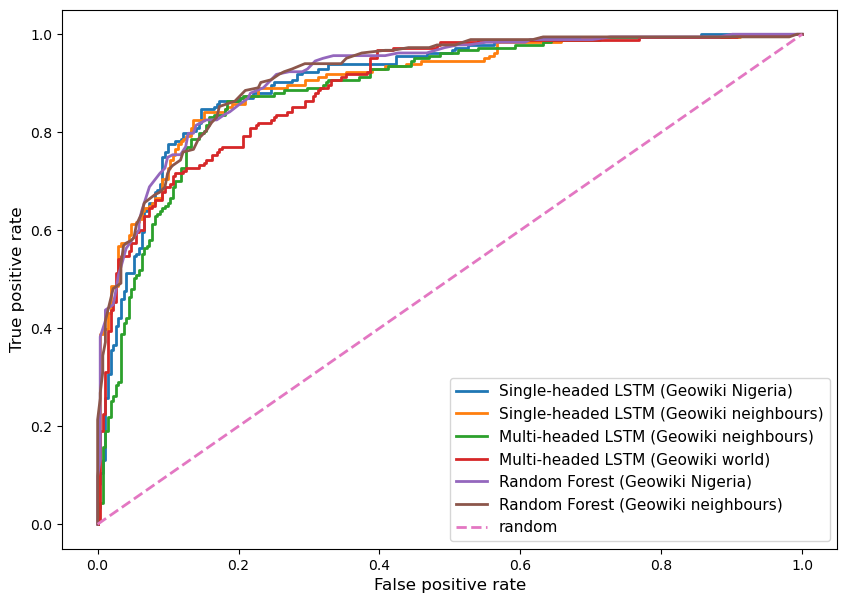

In [262]:
fig, ax = plt.subplots(figsize=(10, 7))

for labels_, preds_, name in zip(labels, preds, names):
    fpr, tpr, thresholds = roc_curve(labels_, preds_)
    ax.plot(fpr, tpr, label=name, linewidth=2)

ax.plot([0, 1], [0, 1], linestyle="--", label="random", linewidth=2)
ax.set_xlabel("False positive rate", fontsize=12)
ax.set_ylabel("True positive rate", fontsize=12)
ax.legend(loc="lower right", fontsize=11)
fig.savefig('../figures/roc-curve-models.png', bbox_inches='tight', dpi=600)
fig.savefig('../figures/roc-curve-models.pdf', bbox_inches='tight', dpi=600)
plt.show()